In [1]:
%matplotlib ipympl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Import own code
from algorithms import *
from signal_data_class import SignalData
from plot_data import plot_inv_frac, plot_all_3d, plot_misfires, plot_roc_curve
from interactive_trigger_class import InteractiveTrigger

sb.set()

SN1 = "../data/SN1_Chirp_300kHzTemplate_0p16SNR_280Start_Sig.npy"  # Nasty noise
SN2 = "../data/SN2_Chirp_300kHzTemplate_0p32SNR_280Start_Sig.npy"  # Nice noise
SX1 = "../data/SX1_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_99mV.npy"
SX2 = "../data/SX2_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_132mV.npy"
SX3 = "../data/SX3_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_264mV.npy"
XN1 = "../data/XN1_Chirp_300kHzTemplate_0p16SNR_280Start_Noise.npy"  # Nasty noise
XN2 = "../data/XN2_Chirp_300kHzTemplate_0p32SNR_280Start_Noise.npy"  # Nice noise


In [2]:
data = {}
# data["SN1"] = np.array(list( zip(*np.load(SN1)) ))
# data["SN2"] = np.array(list( zip(*np.load(SN2)) ))
data["SX1"] = np.array(list( zip(*np.load(SX1)) ))
# data["SX2"] = np.array(list( zip(*np.load(SX2)) ))
# data["SX3"] = np.array(list( zip(*np.load(SX3)) ))
# data["XN1"] = np.array(list( zip(*np.load(XN1)) ))
data["XN2"] = np.array(list( zip(*np.load(XN2)) ))

# df = pd.read_csv("../data/SX1+XN1.csv")
# data["SX1+XN1"] = [df.t, df.signal]
df = pd.read_csv("../data/SX1+XN2.csv")
data["SX1+XN2"] = [df.t, df.signal]

SX1_truth_data_df = pd.read_csv("../data/SX1_truth_data.csv")
# SX1_truth_data = list(SX1_truth_data_df.truth_data)
SX1_truth_data = SX1_truth_data_df.truth_data


In [3]:
time = data["SX1+XN2"][0]
signal = data["SX1+XN2"][1]
truth_data = SX1_truth_data

sigdat = SignalData(time, signal, truth_data=truth_data)
sigdat.get_sensitivity_specificity_v1()


(0.7614314115308151, None)

In [4]:
# print(len(data["SX1+XN2"][0]))
# print(len(data["XN2"][0]))
foo = 1_000_000
# print(foo)

time_p1 = np.array( data["SX1+XN2"][0] )[:foo]
time_p2 = np.array( data["SX1+XN2"][0] )[-1] + np.array( data["XN2"][0][:foo] )  # Need to shift vals
time = np.concatenate(( time_p1, time_p2 ))
signal = np.concatenate(( data["SX1+XN2"][1][:foo], data["XN2"][1][:foo] ))
truth_data = np.concatenate(( SX1_truth_data[:foo], np.zeros(foo) ))

sigdat_combo = SignalData(time, signal, truth_data=truth_data)
sigdat_combo.get_sensitivity_specificity_v1()

# print()
# print(len(time))
# print(len(signal))
# print(len(truth_data))


(0.764, 0.0)

In [5]:
# inv_frac_vals = np.arange(1, 8, 1)
# delay_samples_vals = np.arange(50, 250, 50)

# u1_roc_data = sigdat_combo.get_roc_curve_data(inv_frac_vals = inv_frac_vals,
#                                         delay_samples_vals = delay_samples_vals,
#                                         verbose = True,
#                                         tolerance = 2e-3,
#                                        )

# u1_pd = pd.DataFrame(u1_roc_data)  # Faster to pass list of dicts than to add rows iteratively
# u1_pd.to_csv("u1_roc_data.csv.temp")


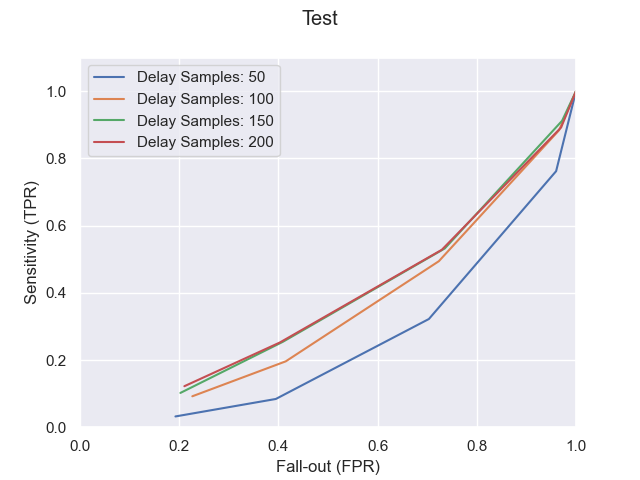

,Unnamed: 0,sensitivity,specificity,inv_frac,delay_samples
0,0,1.000,0.000000,1,50
5,5,0.084,0.605210,6,50
4,4,0.322,0.296593,5,50
3,3,0.762,0.040080,4,50
1,1,1.000,0.000000,2,50
2,2,0.998,0.000000,3,50
6,6,0.032,0.807615,7,50
8,8,1.000,0.000000,2,100
13,13,0.092,0.773547,7,100
7,7,1.000,0.000000,1,100


In [6]:
u1_pd_analyse = pd.read_csv("u1_roc_data.csv.temp")
plot_roc_curve(u1_pd_analyse, title="Test")
print()
u1_pd_analyse.sort_values(by=["delay_samples"]).head(100)


Label(value='Hitrate: 0.0')

Label(value='Misfire rate: 1.0')

interactive(children=(IntSlider(value=904, description='Decay part / 1024', layout=Layout(width='50%'), max=10…

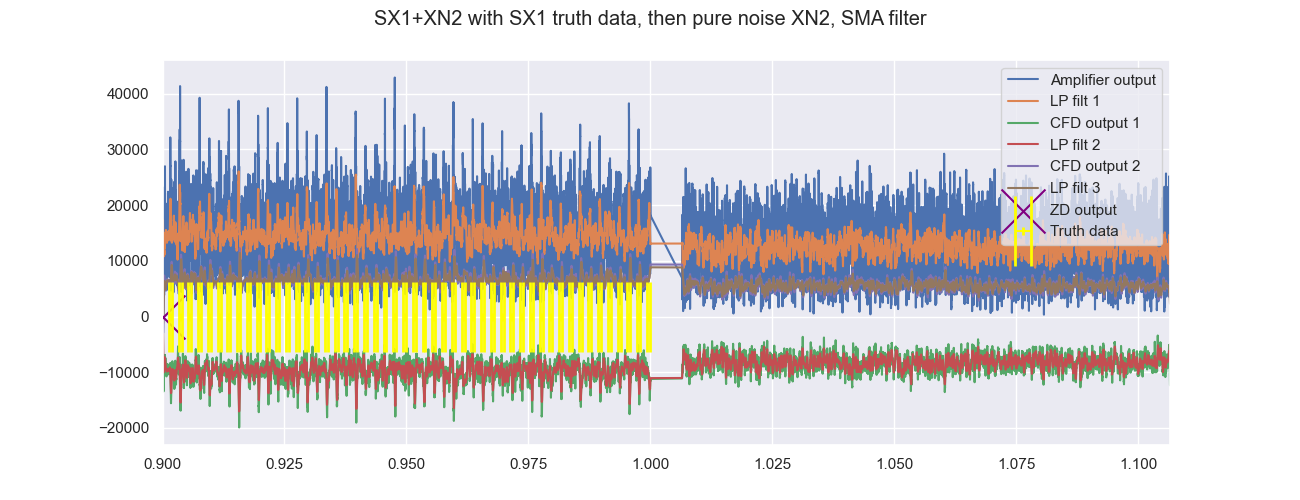

In [14]:
sigdat_combo_image = InteractiveTrigger(
        time,
        signal,
        truth_data = truth_data,
        filter_alg = sma_convolve_extracted,
        title = "SX1+XN2 with SX1 truth data, then pure noise XN2, SMA filter",
        tolerance = 300e-6,
        slice_start = 900_000,
        slice_end = 1_100_000,
    )

sigdat_combo_image.show()


In [8]:
# inv_frac_vals = np.arange(0, 15, 0.5)
# delay_samples_vals = np.arange(0, 300, 25)

# u2_roc_data = sigdat_combo.get_roc_curve_data(inv_frac_vals = inv_frac_vals,
#                                         delay_samples_vals = delay_samples_vals,
#                                         verbose = True,
#                                        )

# u2_pd = pd.DataFrame(u2_roc_data)  # Faster to pass list of dicts than to add rows iteratively
# u2_pd.to_csv("u2_roc_data.csv.temp")


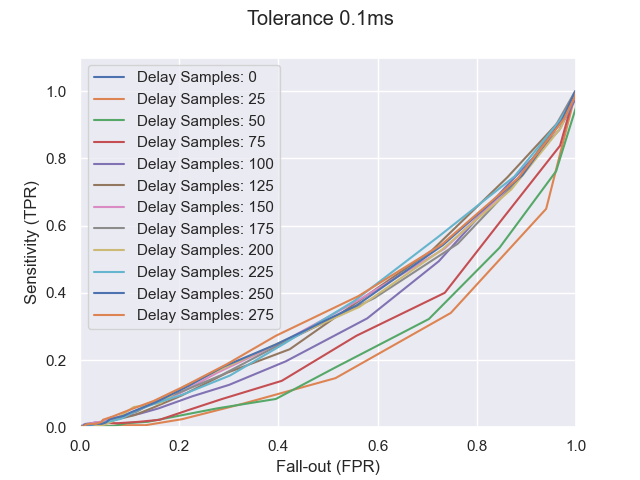

In [9]:
u2_pd_analyse = pd.read_csv("u2_roc_data.csv.temp")
plot_roc_curve(u2_pd_analyse, title="Tolerance 0.1ms")
print()


In [10]:
# inv_frac_vals = np.arange(0, 8, 1)
# delay_samples_vals = np.arange(0, 150, 25)

# u3_roc_data = sigdat_combo.get_roc_curve_data(inv_frac_vals = inv_frac_vals,
#                                         delay_samples_vals = delay_samples_vals,
#                                         tolerance = 300e-6,
#                                         verbose = True,
#                                        )

# u3_pd = pd.DataFrame(u3_roc_data)  # Faster to pass list of dicts than to add rows iteratively
# u3_pd.to_csv("u3_roc_data.csv.temp")


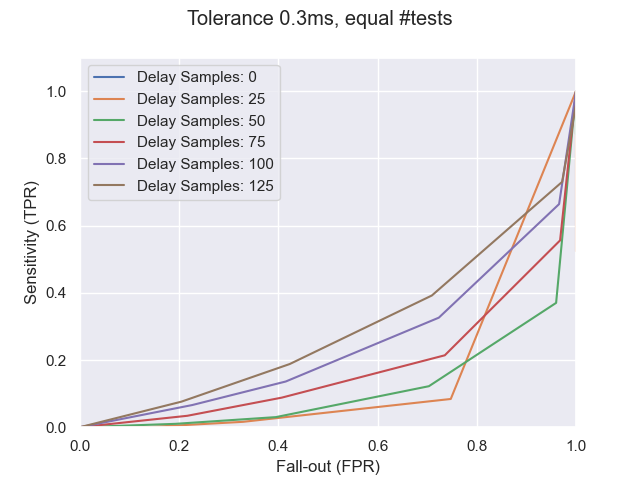

In [11]:
u3_pd_analyse = pd.read_csv("u3_roc_data.csv.temp")
plot_roc_curve(u3_pd_analyse, title="Tolerance 0.3ms, equal #tests")
print()


In [12]:
# inv_frac_vals = np.arange(0, 8, 1)
# delay_samples_vals = np.arange(0, 150, 25)

# u4_roc_data = sigdat_combo.get_roc_curve_data(inv_frac_vals = inv_frac_vals,
#                                         delay_samples_vals = delay_samples_vals,
#                                         tolerance = 2e-3,
#                                         verbose = True,
#                                        )

# u4_pd = pd.DataFrame(u4_roc_data)  # Faster to pass list of dicts than to add rows iteratively
# u4_pd.to_csv("u4_roc_data.csv.temp")


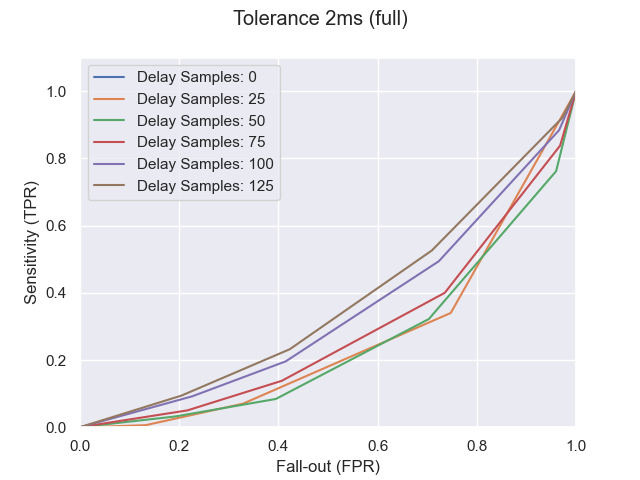

In [13]:
u4_pd_analyse = pd.read_csv("u4_roc_data.csv.temp")
plot_roc_curve(u4_pd_analyse, title="Tolerance 2ms (full)")
print()
